
# <font size="6"> Determine Whether A Candidate is A Real Pulsar


# <font size="5"> Introduction

**Pulsars** are rare neutron stars, as probes of space-time, the interstellar medium and the state of matter, which are very important for the study and development of natural sciences. The search for pulsars relies mainly on detecting signals emitted by periodic broadband radio emission patterns (averaged over multiple rotations) as they rotate at high speeds. However, in practice, all detections are caused by radio frequency interference (RFI) and noise, so it is difficult to find legitimate signals. Hence, the search for **real** pulsars is challenging. 

**Our question is to determine whether a candidate is a real pulsar?** 
HTRU2 is a dataset describing a sample of pulsar candidates collected during the High Temporal Resolution Universe Survey (South). It contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples. Eight continuous variables describe each candidate as below and first four of them are statistics obtained from integrated pulse profile and the remaining are from DM-SNR curve.This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency.Please see the information as below,
* Mean of the integrated profile.
* Standard deviation of the integrated profile.
* Excess kurtosis of the integrated profile.
* Skewness of the integrated profile.
* Mean of the DM-SNR curve.
* Standard deviation of the DM-SNR curve.
* Excess kurtosis of the DM-SNR curve.
* Skewness of the DM-SNR curve.
* Class:1 means real pulsar and 0 otherwise.

# <font size="5"> Preliminary exploratory data analysis

In [1]:
# load packages
library(tidyverse)
library(tidymodels)      
install.packages("GGally")                    
library("GGally")


Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflict

In [2]:
set.seed(1)

In [3]:
#load the data; adding column names manually;
pulsar_raw_data <- read_csv("data/HTRU_2.csv", col_names = FALSE) 
pulsar_raw_data <-rename(pulsar_raw_data,
       Mean_IP = X1,
       SD_IP = X2,
       ExcessKurtosis_IP = X3,
       Skewness_IP = X4,
       Mean_DS = X5,
       SD_DS = X6,
       ExcessKurtosis_DS = X7,
       Skewness_DS = X8, 
       Class = X9) %>%
mutate(Class = as_factor(Class)) 
head(pulsar_raw_data)



Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [4]:
glimpse(pulsar_raw_data)

Rows: 17,898
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.1998328, 1.6772575, 3.1212375, 3.6429766, 1.17892…
$ SD_DS             <dbl> 19.110426, 14.860146, 21.744669, 20.959280, 11.4687…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [5]:
#split the data into traing data and testing data
pulsar_split <- initial_split(pulsar_raw_data,prop=0.75,strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,424
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.465318154, 0.323328365, -0.06841463…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.199833, 1.677258, 3.121237, 3.642977, 1.178930, 1…
$ SD_DS             <dbl> 19.11043, 14.86015, 21.74467, 20.95928, 11.46872, 1…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …
Rows: 4,474
Columns: 9
$ Mean_IP           <dbl> 119.48438, 117.94531, 138.17969, 114.36719, 117.367…
$ SD_IP             <dbl> 48.76506, 45.50658, 51.52448, 51.94572, 53.90861, 4…
$ ExcessKurtosis_IP <dbl> 0.03146022, 0.32543756, -0.03185233, -0.09449890, 0…
$ Ske

In [6]:
# check if there are missing values in training data
na.omit(pulsar_train, cols=c("Mean_IP", "SD_IP", "ExcessKurtosis_IP", "Skewness_IP", 
                             "Mean_DS", "SD_DS", "ExcessKurtosis_DS", "Skewness_DS","Class")) %>%
head(6)
glimpse(pulsar_train)
#as we can observe above, row count remains the same meaning that there aren't any missing values

Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


Rows: 13,424
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.465318154, 0.323328365, -0.06841463…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.199833, 1.677258, 3.121237, 3.642977, 1.178930, 1…
$ SD_DS             <dbl> 19.11043, 14.86015, 21.74467, 20.95928, 11.46872, 1…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …


In [7]:
# summarize the means of the 8 predictor variables in a table
mean_pulsar_train <- pulsar_train %>%
summarize(AVG_MeanIP = mean(Mean_IP, na.rm = TRUE),
          AVG_SDIP = mean(SD_IP,na.rm = TRUE),
          AVG_ExcessKurtosisIP = mean(ExcessKurtosis_IP,na.rm = TRUE),
          AVG_SkewnessIP = mean(Skewness_IP,na.rm = TRUE),
          AVG_MeanDS = mean(Mean_DS,na.rm = TRUE),
          AVG_SDDS = mean(SD_DS,na.rm = TRUE),
          AVG_ExcessKurtosisDS = mean(ExcessKurtosis_DS,na.rm = TRUE),
          AVG_SkewnessDS = mean(Skewness_DS,na.rm = TRUE))         
mean_pulsar_train
#The average of each variable is as below

AVG_MeanIP,AVG_SDIP,AVG_ExcessKurtosisIP,AVG_SkewnessIP,AVG_MeanDS,AVG_SDDS,AVG_ExcessKurtosisDS,AVG_SkewnessDS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.9139,46.5429,0.4840392,1.79401,12.69251,26.34225,8.314097,105.3613


In [8]:
# Summarize the proportion of each Class in a table
pulsar_proportions <- pulsar_train %>%
                      group_by(Class) %>%
                      summarize(n=n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))
pulsar_proportions
#The proportion of Class 0 vs Class 1 is roughly 91% vs 9%, which means only 9% are real pulsar.

`summarise()` ungrouping output (override with `.groups` argument)


Class,n,percent
<fct>,<int>,<dbl>
0,12183,90.755364
1,1241,9.244636


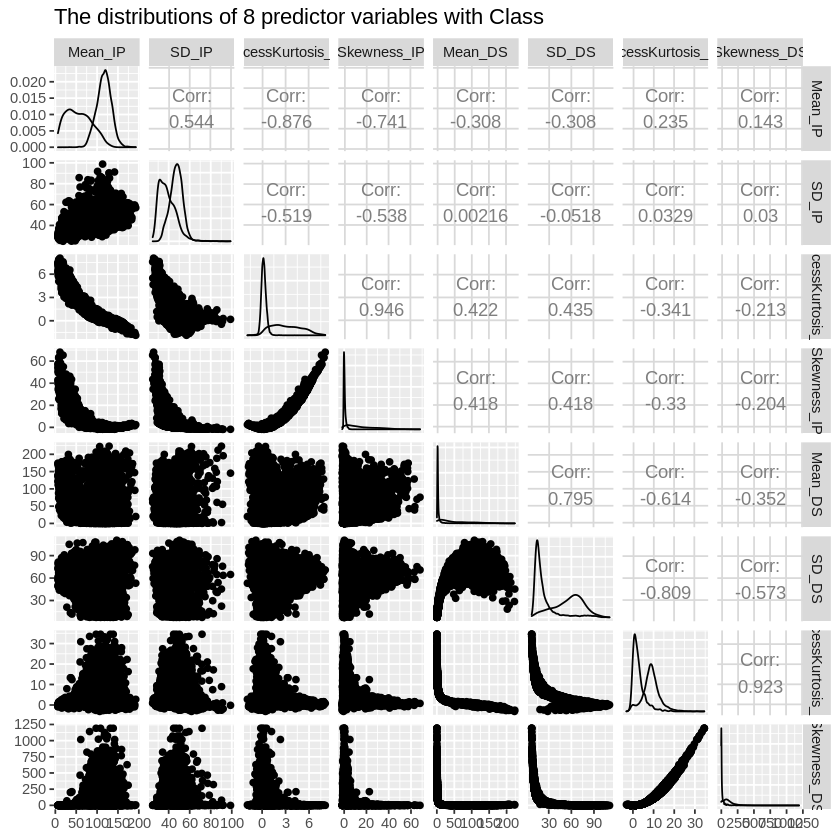

In [9]:
#compares the distributions of 8 predictor variables to decide which one to use in our analysis.

pulsar_dist_plot <- pulsar_train %>%
   ggpairs(pulsar_train, columns = 1:8, aes(colour=Class),title="The distributions of 8 predictor variables with Class")
pulsar_dist_plot


# <font size="4">Choosing Predictive Variables
By observing the above line graph, we find that all the 8 variables distribute well with Class1 as well as Class2,so all of them are  helpful for Class judgment. However, through the research we find that both kurtosis and skewness are functions of the mean and variance of a distribution and have very similar functional definitions(Bradley,2021). Therefore, we choose ExcessKurtos as we know more about kurtosis. Overall, we have 6 variables, which are Mean_IP,SD_IP,ExcessKurtosis_IP,Mean_DS,SD_DS and ExcessKurtosis_DS.

In [12]:
#update the new training and testing data
pulsar_train_selected <- pulsar_train %>%
select(-Skewness_IP, -Skewness_DS)
head(pulsar_train_selected)
glimpse(pulsar_train_selected)

pulsar_test_selected <- pulsar_test %>%
select(-Skewness_IP, -Skewness_DS)
head(pulsar_test_selected)
glimpse(pulsar_test_selected)

Mean_IP,SD_IP,ExcessKurtosis_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,3.199833,19.11043,7.975532,0
102.50781,58.88243,0.46531815,1.677258,14.86015,10.576487,0
103.01562,39.34165,0.32332837,3.121237,21.74467,7.735822,0
136.75000,57.17845,-0.06841464,3.642977,20.95928,6.896499,0
88.72656,40.67223,0.60086608,1.178930,11.46872,14.269573,0
93.57031,46.69811,0.53190485,1.636288,14.54507,10.621748,0


Rows: 13,424
Columns: 7
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.465318154, 0.323328365, -0.06841463…
$ Mean_DS           <dbl> 3.199833, 1.677258, 3.121237, 3.642977, 1.178930, 1…
$ SD_DS             <dbl> 19.11043, 14.86015, 21.74467, 20.95928, 11.46872, 1…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …


Mean_IP,SD_IP,ExcessKurtosis_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
119.48438,48.76506,0.03146022,0.9991639,9.279612,19.206230,0
117.94531,45.50658,0.32543756,2.8361204,23.118350,8.943212,0
138.17969,51.52448,-0.03185233,6.3302676,31.576347,5.155940,0
114.36719,51.94572,-0.09449890,2.7382943,17.191891,9.050612,0
117.36719,53.90861,0.25795344,6.0183946,24.766123,4.807783,0
99.91406,43.91950,0.47572850,0.6195652,9.440976,20.106639,0


Rows: 4,474
Columns: 7
$ Mean_IP           <dbl> 119.48438, 117.94531, 138.17969, 114.36719, 117.367…
$ SD_IP             <dbl> 48.76506, 45.50658, 51.52448, 51.94572, 53.90861, 4…
$ ExcessKurtosis_IP <dbl> 0.03146022, 0.32543756, -0.03185233, -0.09449890, 0…
$ Mean_DS           <dbl> 0.9991639, 2.8361204, 6.3302676, 2.7382943, 6.01839…
$ SD_DS             <dbl> 9.279612, 23.118350, 31.576347, 17.191891, 24.76612…
$ ExcessKurtosis_DS <dbl> 19.206230, 8.943212, 5.155940, 9.050612, 4.807783, …
$ Class             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


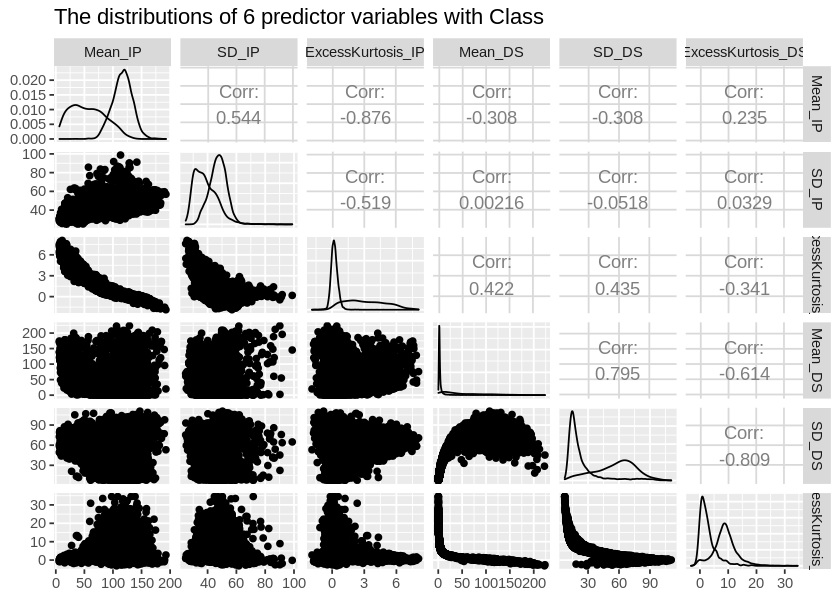

In [37]:
#view the distributions of 6 predictor variables that we want to use in our analysis.

pulsar_dist_plot_selected <- pulsar_train_selected %>%
   ggpairs(pulsar_train_selected, columns = 1:6, aes(colour=Class),title="The distributions of 6 predictor variables with Class")
pulsar_dist_plot_selected

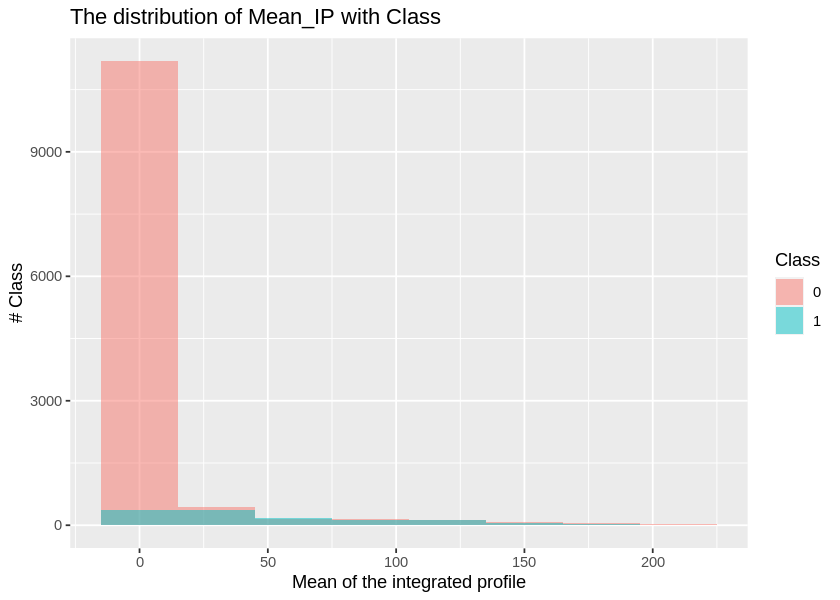

In [38]:
#use histogram to see the distribution of Mean_IP
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the integrated profile", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_IP with Class")

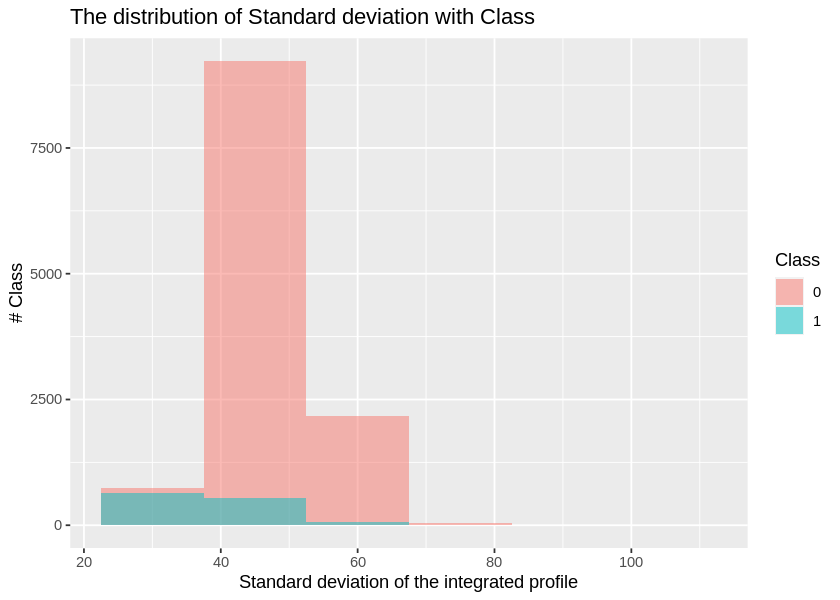

In [39]:
#use histogram to see the distribution of SD_IP
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= SD_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the integrated profile", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of Standard deviation with Class")

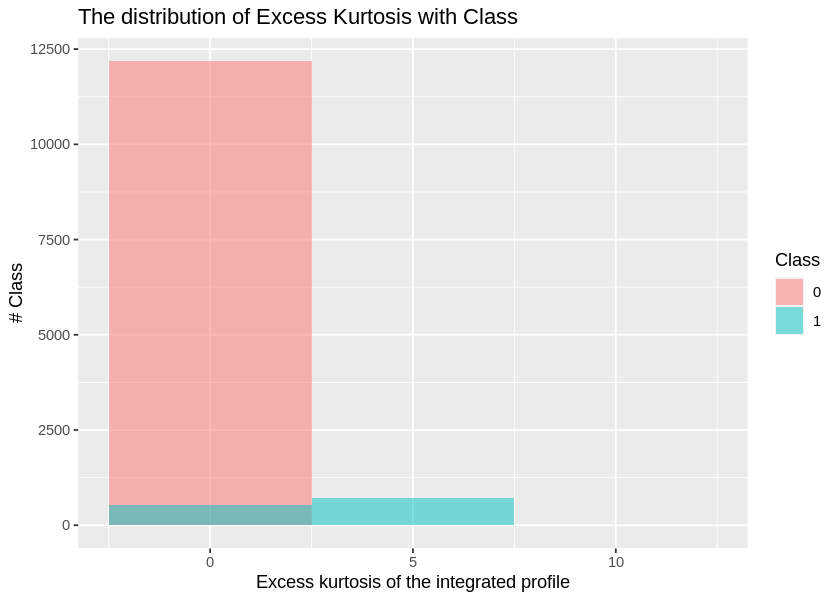

In [40]:
#use histogram to see the distribution of ExcessKurtosis_IP
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= ExcessKurtosis_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the integrated profile", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of Excess Kurtosis with Class")

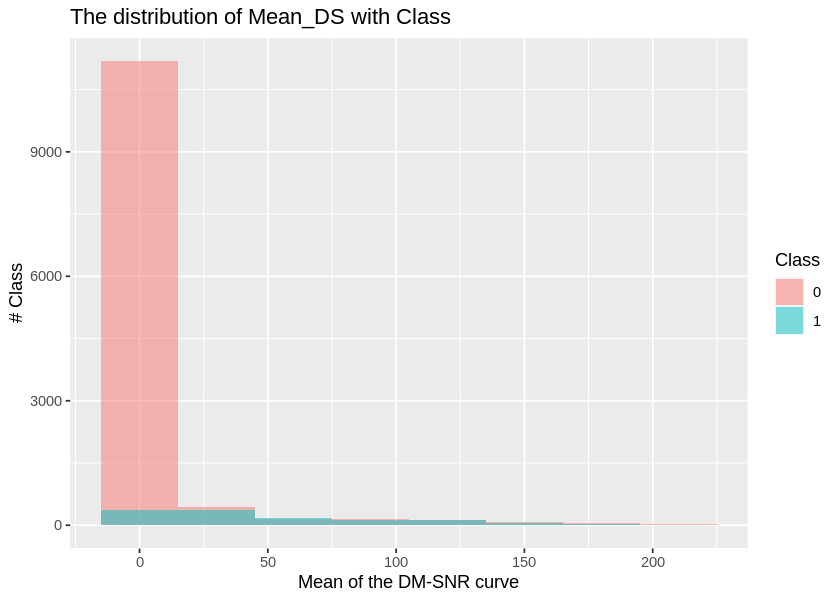

In [41]:
#use histogram to see the distribution of Mean_DS
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the DM-SNR curve", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_DS with Class")

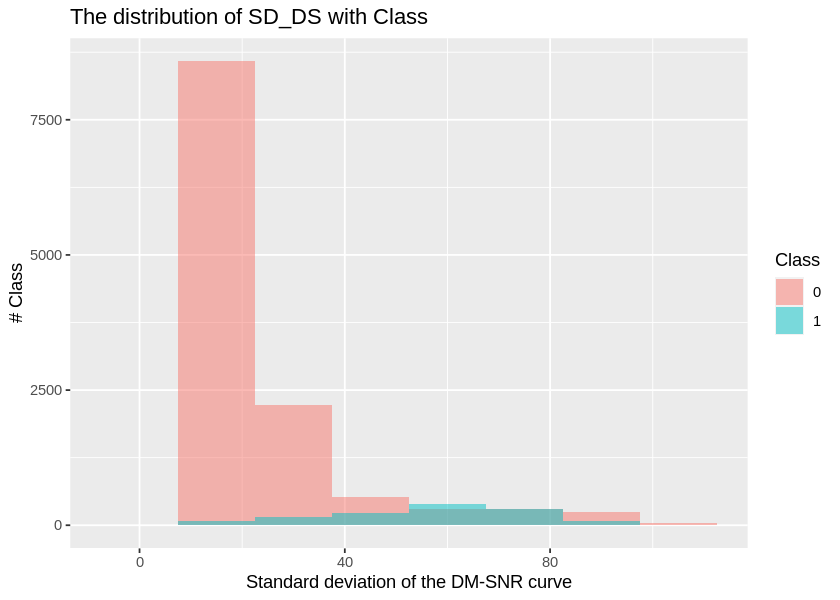

In [42]:
#use histogram to see the distribution of SD_DS
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= SD_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the DM-SNR curve", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of SD_DS with Class")

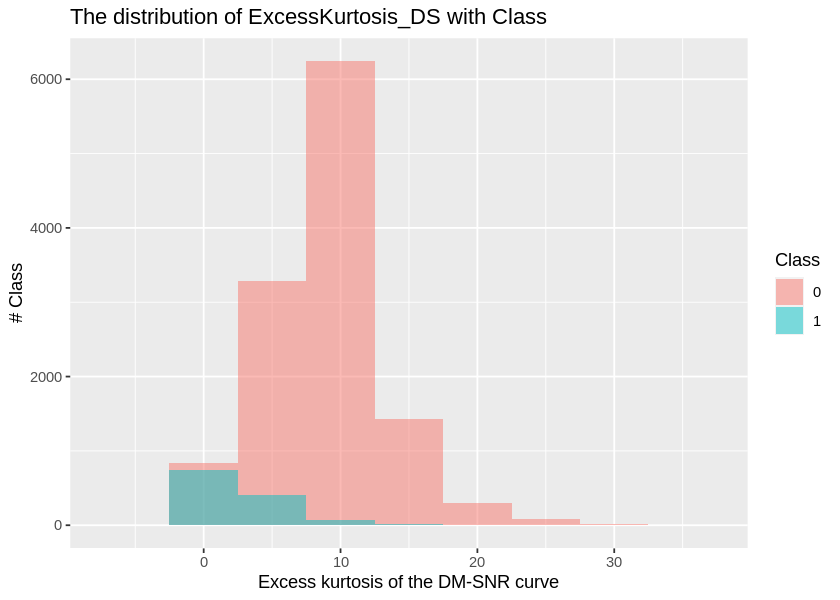

In [43]:
#use histogram to see the distribution of ExcessKurtosis_DS
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train_selected %>% 
    ggplot(aes(x= ExcessKurtosis_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the DM-SNR curve", 
       y = "# Class", 
       fill = "Class")+
ggtitle("The distribution of ExcessKurtosis_DS with Class")

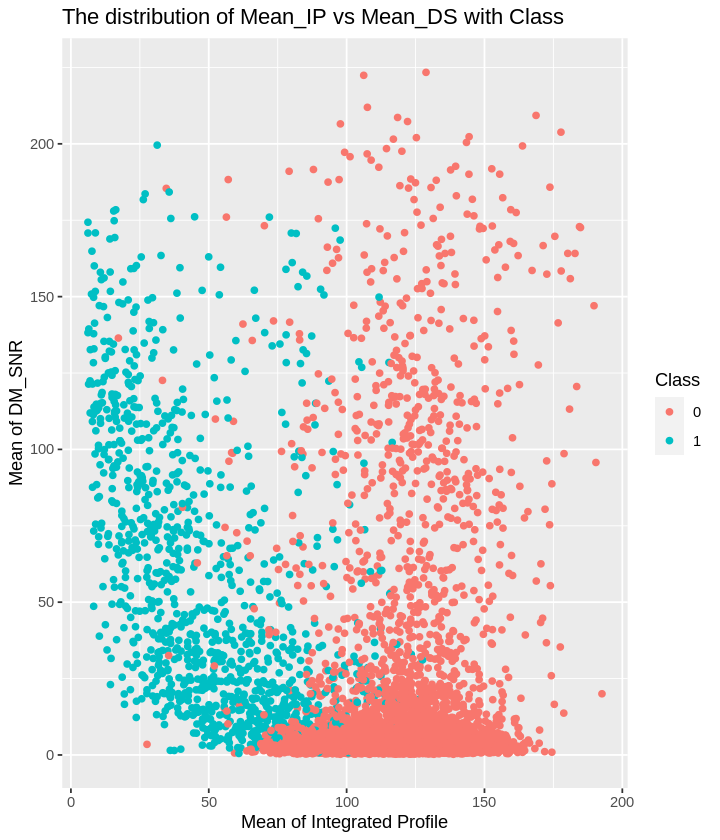

In [52]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train_selected %>% 
    ggplot(aes(x= Mean_IP, y= Mean_DS, color = Class)) +
    geom_point() +
    labs(x = "Mean of Integrated Profile", 
       y = "Mean of DM_SNR",
       color = "Class") +
ggtitle("The distribution of Mean_IP vs Mean_DS with Class")

#The smaller the mean of the integrated profile, the higher possibility to be a pulsar;
#However, mean of DM_SNR curve doesn'influence that much

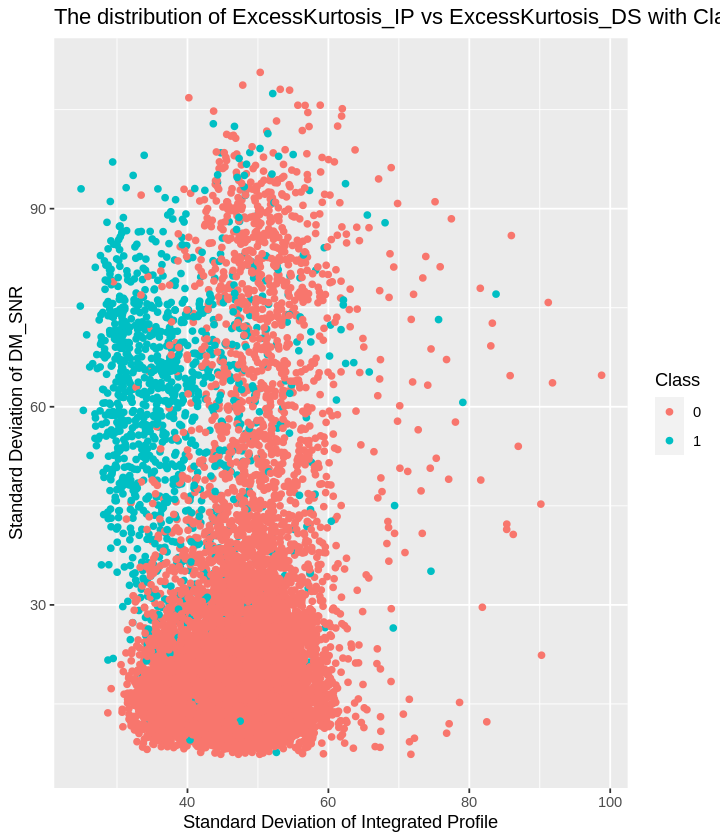

In [53]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train_selected %>% 
    ggplot(aes(x= SD_IP, y= SD_DS, color = Class)) +
    geom_point() +
    labs(x = "Standard Deviation of Integrated Profile", 
       y = "Standard Deviation of DM_SNR",
       color = "Class") +
ggtitle("The distribution of ExcessKurtosis_IP vs ExcessKurtosis_DS with Class")

#Pulsar has a lower standard derivation of integrated profile

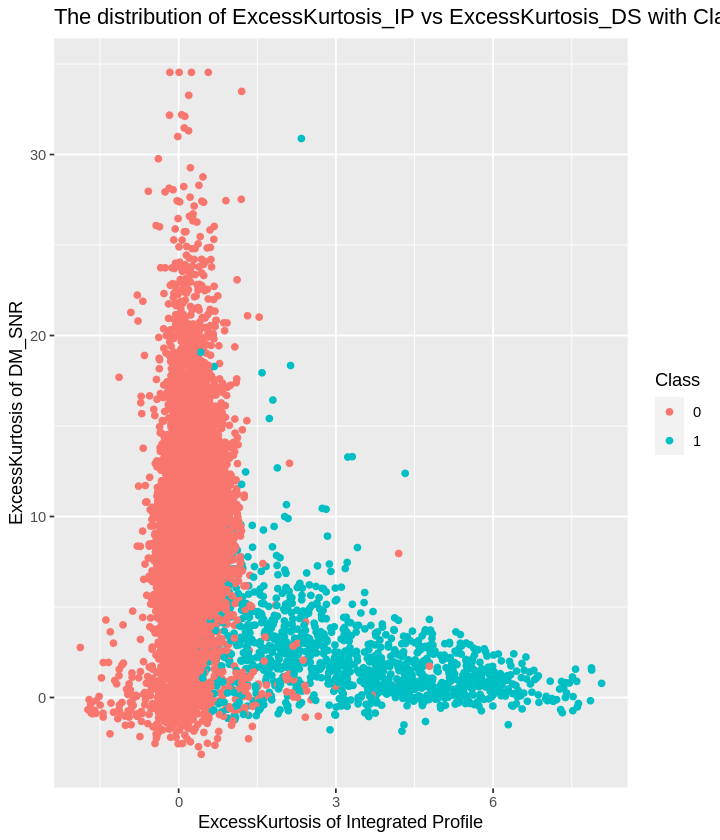

In [54]:
options(repr.plot.width = 6, repr.plot.height = 7)
pulsar_train_selected %>% 
    ggplot(aes(x= ExcessKurtosis_IP, y= ExcessKurtosis_DS, color = Class)) +
    geom_point() +
    labs(x = "ExcessKurtosis of Integrated Profile", 
       y = "ExcessKurtosis of DM_SNR",
       color = "Class") +
ggtitle("The distribution of ExcessKurtosis_IP vs ExcessKurtosis_DS with Class")

# It seems that pulsar has a higher Excess Kurtosis of Integrated Profile but lower Excess Kurtosis of DM-SMR curve. 
#So maybe we can further analysis whether there is a threshold for that?

# <font size="5"> 4.Methods

# <font size="5"> 5.Expected outcomes and significance

We hope to analyze the influence of each predictive variables on the determination of real pulsars and find the most influential factor. And luckily train a model to determine whether a candidate is a pulsar. The results will facilitate finding pulsars and contribute to the study of pulsars and the development of natural science. With this result, we can further investigate why this factor has the most significant influence on the determination of pulsars and thus find the root causes.